In [1]:
import numpy as np
from sdm_ml.dataset import BBSDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sparse_gp.kernels.rbf_kernel import RBFKernel
from sparse_gp.likelihoods.bernoulli_logit_likelihood import BernoulliLogitLikelihood
from sparse_gp.inference.laplace_inference import LaplaceInference

In [2]:
csv_folder = '../../../multi_species/bbs/dataset/csv_bird_data/'
dataset = BBSDataset(csv_folder)

In [3]:
training_set = dataset.get_training_set()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

covariates_full = training_set['covariates'].values
outcomes = training_set['outcomes'][['American Crow', 'Brown-headed Cowbird']]

scaler = StandardScaler()

covariates = scaler.fit_transform(covariates_full.astype(np.float32)[:, :])
outcomes = outcomes.values[:, 0].astype(float)

In [5]:
kernel = RBFKernel(np.arange(covariates.shape[1]))

In [6]:
likelihood = BernoulliLogitLikelihood()

In [7]:
inference = LaplaceInference(kernel, likelihood, verbose=True)

In [8]:
inference.fit(covariates, outcomes)

Log marginal likelihood: -280.68
Gradient square norm: 69.61
Log marginal likelihood: -280.68
Gradient square norm: 69.61
Log marginal likelihood: -248.15
Gradient square norm: 15.02
Log marginal likelihood: -237.32
Gradient square norm: 3.02
Log marginal likelihood: -241.96
Gradient square norm: 24.39
Log marginal likelihood: -235.20
Gradient square norm: 1.74
Log marginal likelihood: -236.18
Gradient square norm: 5.51
Log marginal likelihood: -234.35
Gradient square norm: 1.31
Log marginal likelihood: -235.25
Gradient square norm: 7.71
Log marginal likelihood: -233.97
Gradient square norm: 1.50
Log marginal likelihood: -233.60
Gradient square norm: 1.33
Log marginal likelihood: -233.72
Gradient square norm: 2.72
Log marginal likelihood: -233.42
Gradient square norm: 1.28
Log marginal likelihood: -233.21
Gradient square norm: 0.86
Log marginal likelihood: -233.17
Gradient square norm: 0.89
Log marginal likelihood: -233.11
Gradient square norm: 0.46
Log marginal likelihood: -233.13
Gra

     fun: 230.39310538774154
     jac: array([-0.00411607,  0.00593232,  0.00117996, -0.00525273, -0.00643075,
       -0.00330291, -0.0022636 ,  0.00889934,  0.00286119])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 49
    njev: 98
  status: 0
 success: True
       x: array([ 3.28621292,  3.94869722,  2.00430826, -1.0322346 , 19.1410411 ,
        2.59568038, 26.84064602,  1.64463683,  3.03876665])

In [9]:
print(inference.kernel)

RBF Kernel with lengthscales [ 3.29  3.95  2.   -1.03 19.14  2.6  26.84  1.64] and stdev 3.04.


In [10]:
inference.kernel.stdev

3.0387666474875976

In [11]:
# Predict the test set
test_set = dataset.get_test_set()
test_covariates = scaler.transform(test_set['covariates'])
test_outcomes = test_set['outcomes']['American Crow'].values

In [12]:
to_predict = test_covariates

to_predict.shape

(1157, 8)

In [13]:
means, vars = inference.predict(to_predict)
means.shape, vars.shape

((1157,), (1157,))

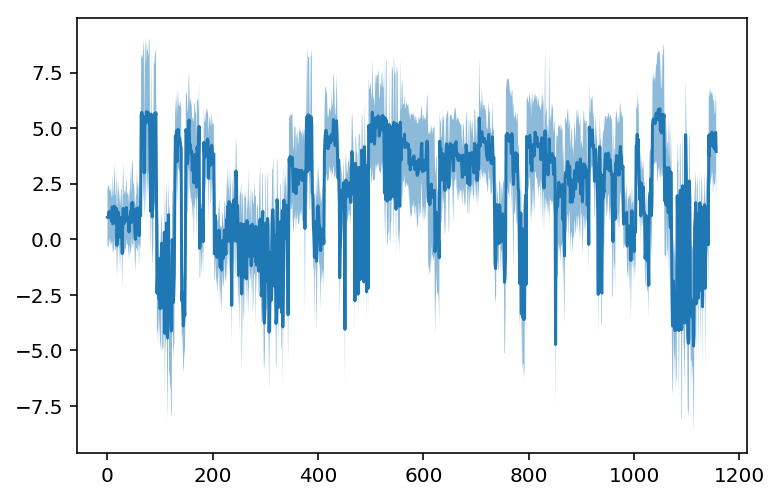

In [14]:
plt.plot(means)
plt.fill_between(np.arange(means.shape[0]), means - 2*np.sqrt(vars), means + 2*np.sqrt(vars), alpha=0.5)

In [15]:
from scipy.special import expit
samples = np.random.multivariate_normal(mean=means, cov=np.diag(vars), size=1000)
mean_probs = expit(samples).mean(axis=0)

In [16]:
from sklearn.metrics import log_loss

In [17]:
log_loss(test_outcomes, mean_probs)

0.2702604149508737

In [18]:
# 0.227 in my other. So not perfect, but not terrible, either.